In [31]:
# 08_offense_vs_defense_comparison.ipynb
# ⚔️ Offense vs. Defense Matchup Explorer

# 🛠 Requirements:
# - pandas, matplotlib, seaborn (install via `pip install pandas matplotlib seaborn`)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

DATA_DIR = "./data"

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,8]

In [32]:
# 📂 Load 2023 season advanced stats

stats_path = os.path.join(DATA_DIR, "advanced_season_stats", "2023.csv")
stats = pd.read_csv(stats_path)

In [33]:
# 🎛️ Choose matchup

offense_team = "Washington"
defense_team = "Michigan"

# Lookup rows
off_row = stats[stats["team"] == offense_team].squeeze()
def_row = stats[stats["team"] == defense_team].squeeze()

if off_row.empty or def_row.empty:
    raise ValueError("One or both teams not found in dataset.")

In [34]:
# Metrics to compare (offense vs. defense)
metric_pairs = [
    ("offense_ppa", "defense_ppa"),
    ("offense_successRate", "defense_successRate"),
    ("offense_explosiveness", "defense_explosiveness"),
    ("offense_standardDowns_ppa", "defense_standardDowns_ppa"),
    ("offense_passingDowns_ppa", "defense_passingDowns_ppa"),
    ("offense_lineYards", "defense_lineYards"),
    ("offense_stuffRate", "defense_stuffRate"),
]

labels = [m[0].replace("offense_", "").replace("_", " ") for m in metric_pairs]

off_values = [off_row[o] for o, _ in metric_pairs]
def_values = [def_row[d] for _, d in metric_pairs]

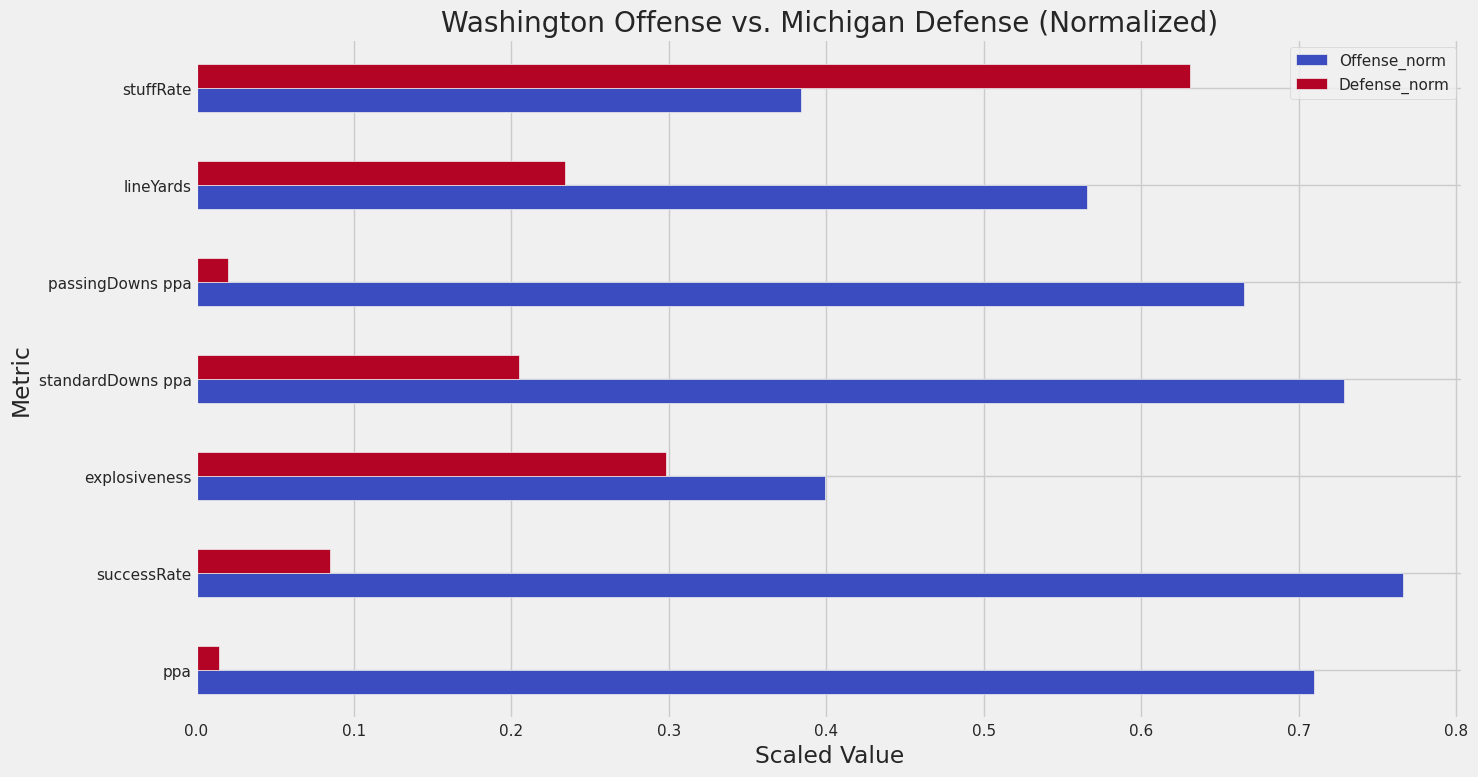

In [35]:
# Combine and normalize (min-max per metric for comparison)
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = pd.DataFrame({
    "Metric": labels,
    "Offense": off_values,
    "Defense": def_values
})

# Compute global min/max for each metric across all teams
off_metrics = [o for o, _ in metric_pairs]
def_metrics = [d for _, d in metric_pairs]

off_min = stats[off_metrics].min()
off_max = stats[off_metrics].max()
def_min = stats[def_metrics].min()
def_max = stats[def_metrics].max()

# Normalize selected teams' metrics based on global scale
off_norm = [(off_row[m] - off_min[m]) / (off_max[m] - off_min[m]) for m in off_metrics]
def_norm = [(def_row[m] - def_min[m]) / (def_max[m] - def_min[m]) for m in def_metrics]

# Prepare for display
data = pd.DataFrame({
    "Metric": labels,
    "Offense": [off_row[m] for m in off_metrics],
    "Defense": [def_row[m] for m in def_metrics],
    "Offense_norm": off_norm,
    "Defense_norm": def_norm
})

# Bar plot comparison
data.set_index("Metric")[["Offense_norm", "Defense_norm"]].plot(kind="barh", colormap="coolwarm")
plt.title(f"{offense_team} Offense vs. {defense_team} Defense (Normalized)")
plt.xlabel("Scaled Value")
plt.ylabel("Metric")
plt.tight_layout()
plt.show()

In [36]:
# Raw metric values side-by-side
data[["Metric", "Offense", "Defense"]]

,Metric,Offense,Defense
0,ppa,0.323618,-0.008876
1,successRate,0.508180,0.343458
2,explosiveness,1.241319,1.147991
3,standardDowns ppa,0.267186,-0.044635
4,passingDowns ppa,0.475453,0.057058
5,lineYards,3.136250,2.639467
6,stuffRate,0.165000,0.198547


In [38]:
# ✅ Summary

# In this notebook, you:
# - Selected two teams (one offense, one defense)
# - Compared performance across key efficiency metrics
# - Visualized mismatches using normalized comparisons

# 🧪 Try This:
# - Swap roles (e.g., DEF vs. OFF the other way)
# - Add additional metrics (e.g., havoc, field position)
# - Combine with matchup predictor or similarity tools